 **<h1>Walmart Reviews Semantic Prediction Model :</h1>**

## **Text/Review Classification Problem**

* **Q. What is Text Classification ?**

      Ans. Text classification is the problem of assigning  categories to text data according to its content.

* **Business Problem :** Given a review (text review), Predict if the Semantic of the review is **Good**, **Neutral** or **Bad**.

* **Type :** Multi class - Classification Problem with Classes 
    * Good
    * Neutral
    * Bad

* **Machine Learning Problem :**

   * Given a review, Classify their category/semantic i.e. Good, Bad or Neutral.

    Input Datapoint = Review, Output Class Label =  Class/Category

* **Constraints :**

  * Imbalanced Dataset 
  * High Latency Constraints
  * Text Data

## **Import the Basic Libraries :**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams

# To filter any warning statements :

import warnings
warnings.filterwarnings('ignore')

# Scikit-Learn Machine Learning Libraries :

from sklearn import feature_extraction, model_selection, manifold, preprocessing, metrics

from sklearn.multiclass import OneVsRestClassifier

## **Load the Dataset :**

In [ ]:
# Read from csv to our dataframe :

features_df = pd.read_csv('/content/Walmart_Features.csv')

features_df

,Unnamed: 0,preprocessed_reviews,Class
0,0,work product looking exactly great,Good
1,1,getting new walmart yet really tired carrier s...,Bad
2,2,would low rate lag hdrwcg video better tv ive ...,Good
3,4,given comfortable top loud go band distortion ...,Good
4,5,test time need mehthe one could downgrade sand...,Bad
...,...,...,...
25677,30001,new expected side im low one video excellent p...,Good
25678,30002,offon product wish week lemon vacation thought...,Bad
25679,30003,light amazing really super thought better fast,Good
25680,30004,dont buy product freezing fix issue sony,Bad


In [ ]:
# Rename the index

features_df.rename(columns = {'Unnamed: 0':'id'}, inplace = True)

features_df

,id,preprocessed_reviews,Class
0,0,work product looking exactly great,Good
1,1,getting new walmart yet really tired carrier s...,Bad
2,2,would low rate lag hdrwcg video better tv ive ...,Good
3,4,given comfortable top loud go band distortion ...,Good
4,5,test time need mehthe one could downgrade sand...,Bad
...,...,...,...
25677,30001,new expected side im low one video excellent p...,Good
25678,30002,offon product wish week lemon vacation thought...,Bad
25679,30003,light amazing really super thought better fast,Good
25680,30004,dont buy product freezing fix issue sony,Bad


In [ ]:
# Set the Index :

features_df.set_index('id',inplace = True)

features_df

,preprocessed_reviews,Class
id,,
0,work product looking exactly great,Good
1,getting new walmart yet really tired carrier s...,Bad
2,would low rate lag hdrwcg video better tv ive ...,Good
4,given comfortable top loud go band distortion ...,Good
5,test time need mehthe one could downgrade sand...,Bad
...,...,...
30001,new expected side im low one video excellent p...,Good
30002,offon product wish week lemon vacation thought...,Bad
30003,light amazing really super thought better fast,Good


## **Final Pre-processed Reviews :**

In [ ]:
features_df

,preprocessed_reviews,Class
id,,
0,work product looking exactly great,Good
1,getting new walmart yet really tired carrier s...,Bad
2,would low rate lag hdrwcg video better tv ive ...,Good
4,given comfortable top loud go band distortion ...,Good
5,test time need mehthe one could downgrade sand...,Bad
...,...,...
30001,new expected side im low one video excellent p...,Good
30002,offon product wish week lemon vacation thought...,Bad
30003,light amazing really super thought better fast,Good


In [ ]:
features_df['preprocessed_reviews'][0:5]

id
0                   work product looking exactly great
1    getting new walmart yet really tired carrier s...
2    would low rate lag hdrwcg video better tv ive ...
4    given comfortable top loud go band distortion ...
5    test time need mehthe one could downgrade sand...
Name: preprocessed_reviews, dtype: object































































































































## **Q. How to classify Text ('Review') using Natural Language Processing :**

Refer this blog:
https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794



**<h2>Solution :</h2>**

a) Old School Approach of Bag-of-Words 
(used with a simple machine learning algorithm)

b) The Popular Word Embedding Model with Word2Vec
(used with a deep learning neural network)

## **Process / Workflow Overview:**

*  **Split the Dataset** into *Train Set* (70%) & *Test Set* (30%).

*   **Get the Target Class Label Data** i.e. *y_train* & *y_test*.

* **Feature Vectorization** (Vectorizing our Input Features) or **Feature Engineering** using **Bag of Words** 

* **Machine Learning Models :** Build & Train them

* **Performance Metrics** : Measure the Model's Performance 

## **1) Split the Dataset into Train & Test Set :**

In [ ]:
# Split the Dataset : Train = 70% and Test = 30%

features_df_train, features_df_test = model_selection.train_test_split(features_df, test_size=0.3)

print('\nTotal No. of Datapoints :', len(features_df))
print('No. of Train Datapoints :', len(features_df_train))
print('No. of Test Datapoints :', len(features_df_test))


Total No. of Datapoints : 25682
No. of Train Datapoints : 17977
No. of Test Datapoints : 7705


## **2) Get the Target Class Labels :**

In [ ]:
## Get the Target Class Labels :

y_train = features_df_train['Class'].values
y_test = features_df_test['Class'].values

set(y_test)

{'Bad', 'Good', 'Neutral'}

## **3) Feature Vectorization Using Bag of Words :**

**<h3> # Feature Vectorization Techniques :</h3>**

**1) Bag of Words :**

*  We build a **Vocab** with all unique words in our corpus of reviews.
*  Count how many times each word occur in a review.
*  Each **Unique Word** acts as a Feature, & their **Count of Occurence** as the feature value.
* **2 Types of Vectorization Techniques :**

    a) CountVectorizer                  
    b) TFIDFVectorizer

**2) Word2Vec :**

* ***Word2Vec*** produces a vector space, typically of several hundred dimensions, with each unique word in the corpus such that words that share common contexts in the corpus are located close to one another in the space.


**[NOTE]** : We will use **Bag of Words** along with **TFIDF Vectorizer** in this case





























































































































































































































































In [ ]:
# Initialization of Tf-Idf Vectorizer (Advanced Variant of Bag of Words)
# Max No. of Features = 10000, Bigram

vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

# Build a Corpus of our Review Train & Test Dataset :

train_corpus = features_df_train['preprocessed_reviews'].values.astype('U')
test_corpus = features_df_test['preprocessed_reviews'].values.astype('U')

# Fit the Vectorizer on the Train Corpus :

vectorizer.fit(train_corpus)

# Get our Input Feature Vectors :

X_train = vectorizer.transform(train_corpus)
X_test = vectorizer.transform(test_corpus)

In [ ]:
# Let's have a look at the Train Corpus :

train_corpus

array(['added ability gaming kid go friend experience perfect mobility portable house',
       'professional doorbell set nestcom connect video wander supplied although sure smokeco car quality checker notified app camera current nest microphone problem website smaller motion already would time give nothing started hello masonry dont buy really tool go make decided difficulty bit detailed impressed get installation adding use work course alarm used turned want immediately seems house handy important recommend thermostat careful wall detects stucco drill phone followed solid easy working drilling compatibility installing come first research step go around one online compare shouldnt detect quite instruction setup far difference people like recommends every good way',
       'music speechcan better dot routine stillamazon allow upload echo wont configuration replacedunderstands',
       ..., 'playing quality charge durable sound excellent',
       'running cake piece setup',
       'read

In [ ]:
# Test Corpus :

test_corpus

array(['seeing self longer say bought cant lol phone tell good',
       'well line seems work clean',
       'much easier console use simple game', ...,
       'spectacular product definitely would gaming sound important recommend picture get bar amazing price',
       'us charge boat daily gift without hour batter father full day great last husband purchase',
       'receive seller return never work replied refund email'],
      dtype='<U2317')

In [ ]:
# Get the Vocab / Dictionary :

vocab = vectorizer.vocabulary_

vocab

{'added': 85,
 'ability': 3,
 'gaming': 3220,
 'kid': 4379,
 'go': 3374,
 'friend': 3154,
 'experience': 2740,
 'perfect': 6007,
 'portable': 6325,
 'house': 3982,
 'professional': 6583,
 'doorbell': 2233,
 'set': 7553,
 'connect': 1607,
 'video': 9266,
 'supplied': 8299,
 'although': 242,
 'sure': 8314,
 'car': 1216,
 'quality': 6732,
 'notified': 5636,
 'app': 357,
 'camera': 1148,
 'current': 1821,
 'nest': 5469,
 'microphone': 5154,
 'problem': 6480,
 'website': 9472,
 'smaller': 7831,
 'motion': 5302,
 'already': 197,
 'would': 9819,
 'time': 8640,
 'give': 3342,
 'nothing': 5619,
 'started': 8119,
 'hello': 3843,
 'dont': 2189,
 'buy': 1053,
 'really': 6854,
 'tool': 8734,
 'make': 5023,
 'decided': 1938,
 'difficulty': 2085,
 'bit': 787,
 'detailed': 2019,
 'impressed': 4092,
 'get': 3250,
 'installation': 4173,
 'adding': 88,
 'use': 9100,
 'work': 9671,
 'course': 1783,
 'alarm': 174,
 'used': 9173,
 'turned': 8874,
 'want': 9358,
 'immediately': 4087,
 'seems': 7496,
 'handy'

**<h3> Let's have a look at X_train & X_test:</h3>**

In [ ]:
# X_train is a sparse matrix

# Shape of X_train
X_train.shape

# 17977 Reviews, 1000 is the No. of Features/Words or Length of Vocab

(17977, 10000)

In [ ]:
# Shape of X_test

X_test.shape

(7705, 10000)

## **3) Machine Learning Models :**

**<h3> Constraints :</h3>**

* Should work well on High Dimensional Data
* Should work good on Text Data
* Should work well with Imbalanced Dataset
* compatible for MultiClass-Classification problem
* Results should be interpretable

**<h3> Models / Options :</h3>**

* Naive Bayes Classifier
* KNN 
* Logistic Regression
* Random Forest


**<h3> A) Naive Bayes :</h3>**

**Characteristics of Naive Bayes Classifier :**

* Works exceptionally well on Text Features
* Probability based Model (Results are very interpretable)
* Baseline Model


In [ ]:
# Import the Naive Bayes Model

from sklearn.naive_bayes import GaussianNB

# Initialse the Model

naivebayes = GaussianNB()

# Train the Classifier on the Train Data :

naivebayes.fit(X_train.toarray(), y_train)

GaussianNB()

In [ ]:
# Predict the O/P Class Labels for the Test Data :

Y_predicted = naivebayes.predict(X_test.toarray())
Y_predicted_prob = naivebayes.predict_proba(X_test.toarray())

# Predicted Class Values for test data :

Y_predicted

array(['Neutral', 'Neutral', 'Good', ..., 'Good', 'Bad', 'Neutral'],
      dtype='<U7')

In [ ]:
# Let's check our Naive Bayes model :

# Actual Result :

print('Actual Result :', y_test[20])

# Predicted Result :

print('Predicted Result : {0} with Probability {1} %'.format(Y_predicted[20],max(Y_predicted_prob[20]*100)))

Actual Result : Good
Predicted Result : Bad with Probability 100.0 %


**<h3> B) K-NN :</h3>**

**Characteristics of K-NN Classifier :**

* results are v.interpretable

In [ ]:
# Import the KNN Classifier Model :

from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN Model :

knn = KNeighborsClassifier()

# Train our KNN model on Train Data :

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
# Predict the O/P Class Labels for the Test Data :

Y_pred = knn.predict(X_test)

# Predicted Class Values for test data :

Y_pred

array(['Good', 'Good', 'Good', ..., 'Good', 'Good', 'Bad'], dtype=object)

**<h3> C) Logistic Regression :</h3>**

**Characteristics of Logistic Regression Classifier :**

* Works well on High Dimensional Data
* handles outliers really well
* works good on Multiclass Classification Problem

In [ ]:
# Import the Model

from sklearn.linear_model import LogisticRegression

# Initialize the Model
# multi_class='multinomial'

logreg = LogisticRegression()

# Fit the Logistic Regression Model on Train Data :

logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Test the Logistic Regression Model :

ytest_pred = logreg.predict(X_test)

In [ ]:
# Predicted Class Values :

ytest_pred

array(['Good', 'Good', 'Good', ..., 'Good', 'Good', 'Bad'], dtype=object)

**<h3> D) Random Forest :</h3>**

In [ ]:
# Import the Random Forest Model :

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Model :

randomforest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

# Fit the Random Forest Model on Train Data :

randomforest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:
# Test the Random Forest Model :

ytest_pred_2 = randomforest.predict(X_test)

In [ ]:
# Predicted Class Values :

ytest_pred_2

array(['Bad', 'Good', 'Good', ..., 'Good', 'Good', 'Bad'], dtype=object)

## **4) Performance Metrics :**

* **F1 Score**
* **Confusion Matrix**

In [ ]:
# Sklearn Mterics Libraries

from sklearn.metrics import f1_score,confusion_matrix

* **F1 Score :**

  * F1 Score [Class = 'Good'] = ( 2 x Precision ['Good'] x Recall ['Good'] )/ ( Precision ['Good'] + Recall ['Good'] )

  * F1 Score [Class = 'Bad'] = ( 2 x Precision ['Bad'] x Recall ['Bad'] )/ ( Precision ['Bad'] + Recall ['Bad'] )

  * F1 Score [Class = 'Neutral'] = ( 2 x Precision ['Neutral'] x Recall ['Neutral'] )/ ( Precision ['Neutral'] + Recall ['Neutral'] )

  -> Now, Compute the Weighted Average of the F1 Score

In [ ]:
# F1 Score of Naive Bayes :
nb_f1score = f1_score(y_test,Y_predicted,average = 'weighted')

# F1 Score of K-NN :
knn_f1score = f1_score(y_test,Y_pred,average = 'weighted')

# F1 Score of Logistic Regression :
log_f1score = f1_score(y_test,ytest_pred,average = 'weighted')

# F1 Score of Random Forest :
rf_f1score = f1_score(y_test,ytest_pred_2,average = 'weighted')

# Print the F1 Scores :

print('F1 Scores :')
print('\nNaive Bayes : ', nb_f1score)
print('K-NN : ',knn_f1score)
print('Logistic Regression : ',log_f1score)
print('Random Forest : ',rf_f1score)

F1 Scores :

Naive Bayes :  0.640718749302927
K-NN :  0.6846221157442872
Logistic Regression :  0.846205996486829
Random Forest :  0.8112898945507261


* **Confusion Matrix :**

  

In [ ]:
# Sklearn Libraries to plot the Confusion Matrix :

from sklearn.metrics import plot_confusion_matrix

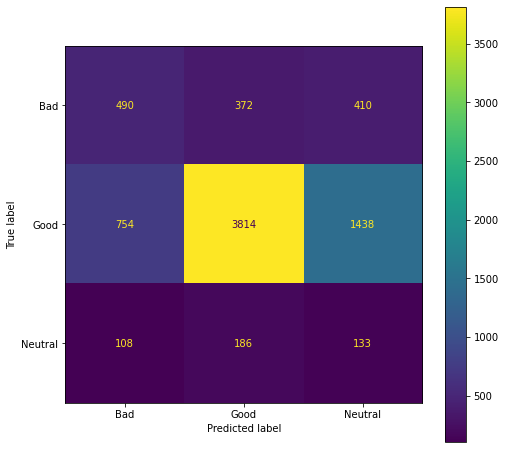

In [ ]:
# Naive Bayes :

rcParams['figure.figsize'] = 8,8
plot_confusion_matrix(naivebayes, X_test.toarray(), y_test)
plt.show()

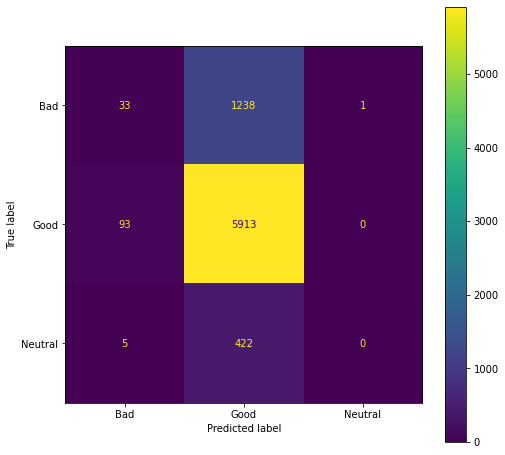

In [ ]:
# K-NN :

plot_confusion_matrix(knn, X_test, y_test)
plt.show()

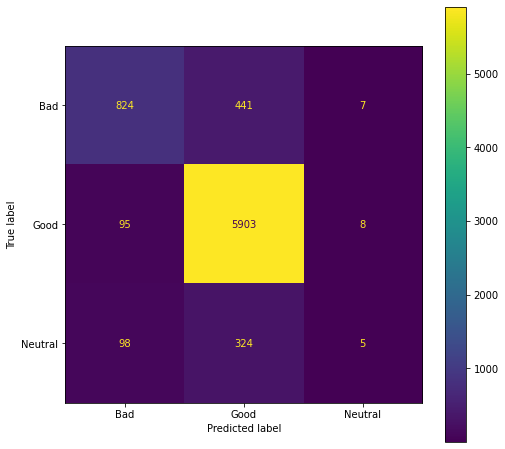

In [ ]:
# Logistic Regression :

plot_confusion_matrix(logreg, X_test, y_test)  
plt.show()

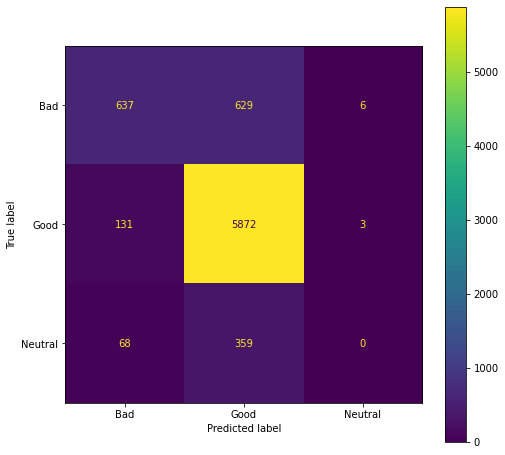

In [ ]:
# Random Forest :

plot_confusion_matrix(randomforest, X_test, y_test)  
plt.show()